# Lab8 -fMNIST Classification with Dense Neural Networks

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import train_test_split

## 1. Get the data from Kaggle

In [3]:
train_data = pd.read_csv("./data/fashion-mnist_train.csv")
test_data = pd.read_csv("./data/fashion-mnist_test.csv")

In [4]:
y_train = train_data.iloc[:, 0].to_numpy()
X_train = train_data.iloc[:, 1:].to_numpy()
y_test = test_data.iloc[:, 0].to_numpy()
X_test = test_data.iloc[:, 1:].to_numpy()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16666)

In [6]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

In [7]:
X_val.shape, y_val.shape

((10000, 784), (10000,))

In [8]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

## 2. Run Great EDA

1) Distribution of target variable

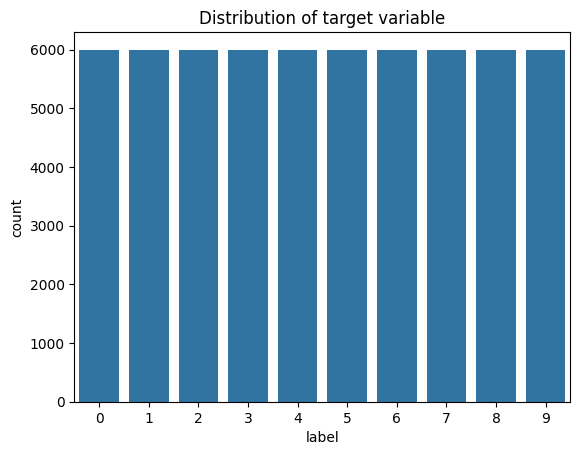

In [9]:
sns.countplot(data = train_data, x='label')
plt.title("Distribution of target variable")
plt.show()

* This countplot shows the distribution of a target variable with labels from 0 to 9. 
* It seems that the classes are well balanced, with the same number of labels from 0 to 9.

2) Distribution of pixel value

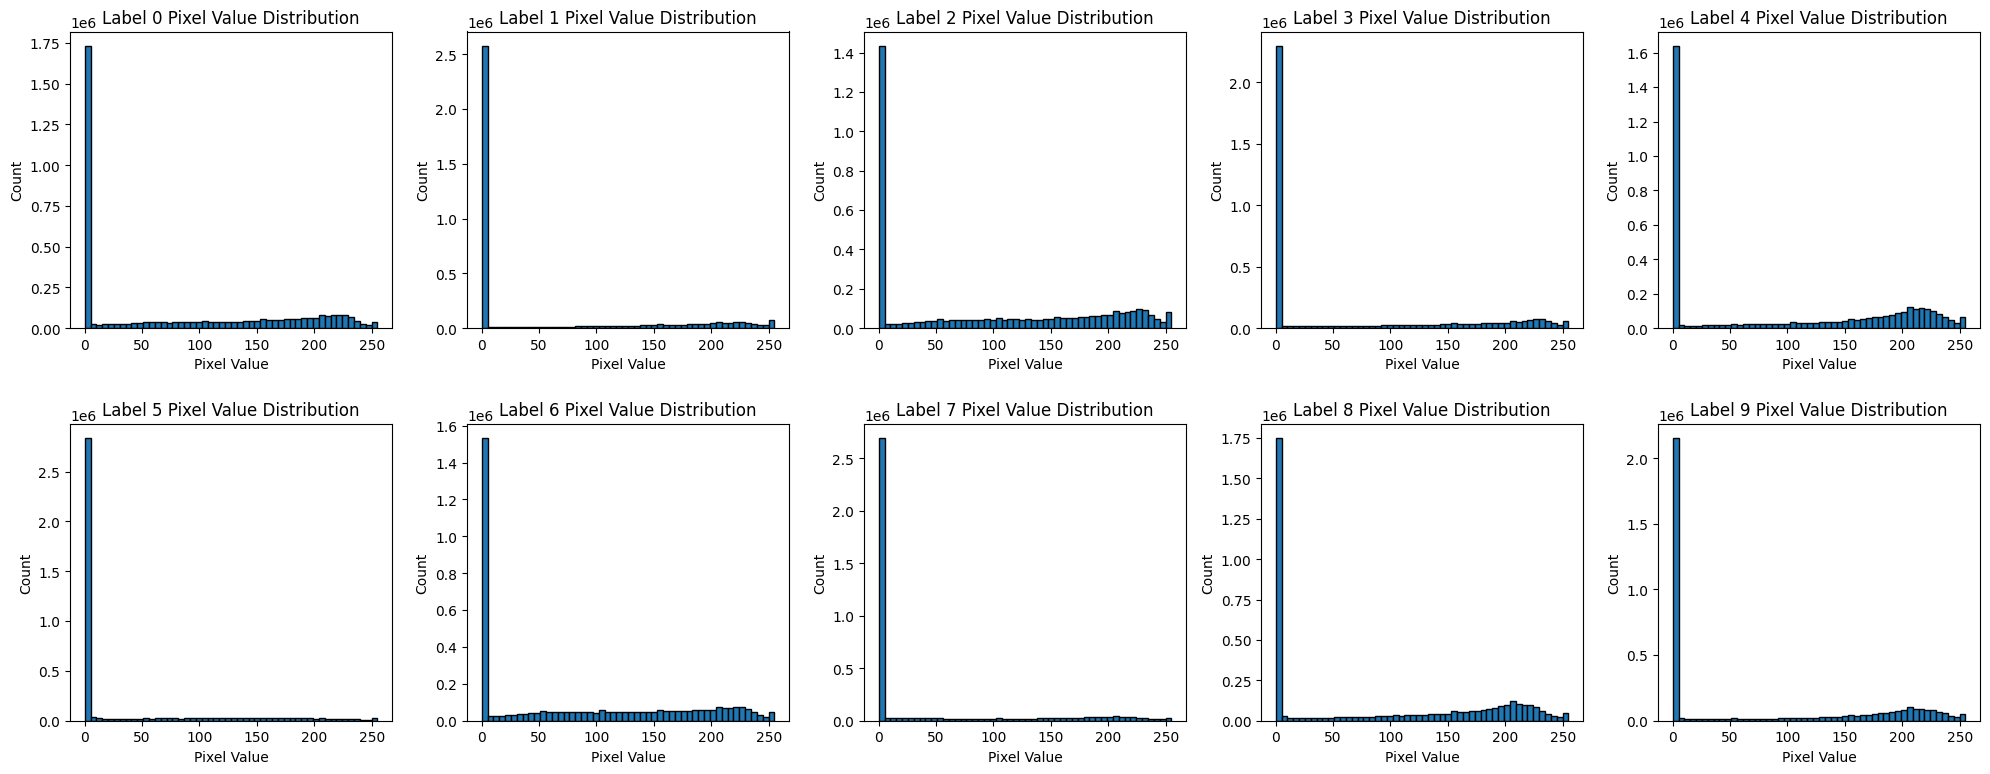

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(10):
    images = X_train[y_train == i]
    pixels = images.flatten()
    axes[i].hist(pixels, bins=50, edgecolor='black')
    axes[i].set_title(f'Label {i} Pixel Value Distribution')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

* The histograms show the pixel value distributions for images. 
* For all labels(0-9), there is a large spike at the pixel value 0, which suggests the image is very dark or black.
* The distribution patterns are quite similar across all labels. They all have the significant peak at pixel value 0, and almost negligible counts for higher pixel values, except for a few pixels.

3) Sum of the images

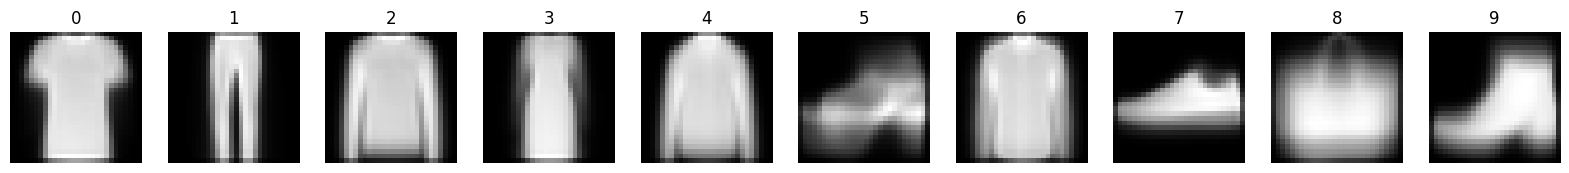

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train.astype('int8') == digit)[0]
    avg_image = np.mean(X_train[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

* The images are accumulated each image for each label.
* image 2, 4, and 6 have similar images, which means it can be difficult to be categorized.

## 3. Define and Train a fully-connected feedforward neural network of the choice using Keras and Tensorflow

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 3s 7ms/step - loss: 20.4056 - accuracy: 0.7130
Epoch 2/5
391/391 [==============================] - 3s 7ms/step - loss: 0.7831 - accuracy: 0.7961
Epoch 3/5
391/391 [==============================] - 3s 8ms/step - loss: 0.5949 - accuracy: 0.8254
Epoch 4/5
391/391 [==============================] - 4s 9ms/step - loss: 0.5436 - accuracy: 0.8383
Epoch 5/5
391/391 [==============================] - 3s 8ms/step - loss: 0.4964 - accuracy: 0.8471


## 4. Evaluate the model using the validation dataset. 

In [23]:
predictions = model.predict(X_val)
prediction_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


1) accuracy

In [24]:
print("accuracy:", accuracy_score(y_val, prediction_class))

accuracy: 0.8305


* accuracy is 83.05%, which means it correctly predicts the class 83.05% of the time across all classes. It is generally a good accuracy rate.

2. Confusion matrix

In [27]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_val, prediction_class))
df_confusion_matrix 

,0,1,2,3,4,5,6,7,8,9
0,793,54,20,30,3,0,85,0,6,1
1,0,958,5,16,2,0,5,0,0,0
2,4,3,730,13,129,0,143,1,4,0
3,23,76,13,868,22,0,25,0,1,0
4,0,7,62,62,594,0,274,0,3,0
5,1,0,0,1,0,915,0,44,1,22
6,184,20,125,28,35,0,638,0,9,1
7,0,0,0,0,0,13,0,932,3,37
8,1,2,8,2,9,2,20,3,926,1
9,0,0,0,0,0,1,1,29,0,951


* The model did quite well on most classes, as indicated by the high numbers on the diagonal.
* Many instances are incorrectly labeled as class 6. As I found in EDA, pixel value 2, 4, and 6 are difficult to be categorized because they have similar patterns.


3) precision, recall, and f1-score

In [30]:
precision = precision_score(y_val, prediction_class, average=None)
recall = recall_score(y_val, prediction_class, average=None)
f1 = f1_score(y_val, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision, 
    'recall': recall, 
    'f1-score': f1
    })
df_evaluate

,precision,recall,f1-score
0,0.788270,0.799395,0.793794
1,0.855357,0.971602,0.909782
2,0.758048,0.710808,0.733668
3,0.850980,0.844358,0.847656
4,0.748111,0.592814,0.661470
5,0.982814,0.929878,0.955614
6,0.535684,0.613462,0.571941
7,0.923687,0.946193,0.934804
8,0.971668,0.950719,0.961079
9,0.938796,0.968432,0.953383


* Class 5, 7, 8, 9 have high precision and recall with over 0.90, indicating the models perfom very well on these classes.
* Class 6 stands out with particularly low precision and recall (0.54, 0.61), resulting in the lowest f1-score among all classes, suggesting that this class is often confused with other classes.

## 5. Run the model on the test set, and provide clear and relevant conclusions

1) accuracy

In [31]:
predictions = model.predict(X_test)
prediction_class = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


In [33]:
print("accuracy:", accuracy_score(y_test, prediction_class))

accuracy: 0.8303


* accuracy is 83.03%, which means it correctly predicts the class 83.03% of the time across all classes. It is generally a good accuracy rate.

2) Confusion matrix

In [34]:
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_class))
df_confusion_matrix 

,0,1,2,3,4,5,6,7,8,9
0,782,60,27,22,0,1,101,0,7,0
1,1,977,1,12,1,0,8,0,0,0
2,10,0,715,11,133,0,128,0,3,0
3,21,86,11,839,19,0,21,0,3,0
4,1,5,49,48,624,0,270,0,3,0
5,0,0,0,2,0,896,2,64,8,28
6,188,24,109,23,36,0,608,0,12,0
7,0,0,0,0,0,6,0,946,1,47
8,2,0,8,1,7,1,16,4,961,0
9,0,0,0,0,0,4,1,38,2,955


* The model did quite well on most classes, as indicated by the high numbers on the diagonal.
* Many instances are incorrectly labeled as class 6. As I found in EDA, pixel value 2, 4, and 6 are difficult to be categorized because they have similar patterns.

3) precision, recall, f1-score

In [35]:
precision = precision_score(y_test, prediction_class, average=None)
recall = recall_score(y_test, prediction_class, average=None)
f1 = f1_score(y_test, prediction_class, average=None)

df_evaluate = pd.DataFrame({
    'precision': precision, 
    'recall': recall, 
    'f1-score': f1
    })
df_evaluate

,precision,recall,f1-score
0,0.778109,0.782,0.780050
1,0.848090,0.977,0.907993
2,0.777174,0.715,0.744792
3,0.875783,0.839,0.856997
4,0.760976,0.624,0.685714
5,0.986784,0.896,0.939203
6,0.526407,0.608,0.564269
7,0.899240,0.946,0.922027
8,0.961000,0.961,0.961000
9,0.927184,0.955,0.940887


* Class 8, 9 have high precision and recall with over 0.90, indicating the models perfom very well on these classes.
* Class 6 stands out with particularly low precision and recall (0.53, 0.61), resulting in the lowest f1-score among all classes, suggesting that this class is often confused with other classes.

Conclusions
* The model's overall accuracy is slightly decreased to 0.8303 from the previously 0.8305. This minor change suggests that the performance of the model remains consistent.
* Class 8, 9 have high precision and recall, showing excellent performance.
* Continue with model diagnostic focusing on error analysis for classes with lower performance, especially for class 6. 

## 6. What if we wanted to increase the precision for class'5', how can we do that without changing the model or retraining?

changing decision threshold can increase precision or recall. Since precision and recall are trade-off on performance. <br>

* Increasing precision: <br>
increasing decision threshold can increase precision. By doing this, we can classify only those instances as positive where the model is more confident, which should reduce the number of false positives.

* Increasing Recall: <br>
decreasing the decision threshold can increase recall. By doing this, more instances can be classifed as the chosen class, which should reduce the number of false negatives.


In [36]:
y_scores = model.predict(X_test)[:, 5]
y_true_binary = (y_test == 5)
precisions, recalls, thresholds = precision_recall_curve(y_true_binary, y_scores)

313/313 [==============================] - 1s 2ms/step


In [37]:
idx = (precisions >= precision[5]).argmax()
threshold = thresholds[idx]
threshold

0.43945357

Original precision and recall values at threshold 0.44
* precision: 0.987
* recall: 0.896

Increasing precision

In [38]:
threshold = 0.7
new_pred = (y_scores >= threshold)
new_precision = precision_score(y_true_binary, new_pred)
new_recall = recall_score(y_true_binary, new_pred)
print("threshold:", threshold)
print("new precision:", new_precision)
print("new recall:", new_recall)

threshold: 0.7
new precision: 0.9921436588103255
new recall: 0.884


## 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining?

Increasing recall

In [40]:
threshold = 0.1
new_pred = (y_scores >= threshold)
new_precision = precision_score(y_true_binary, new_pred)
new_recall = recall_score(y_true_binary, new_pred)
print("threshold:", threshold)
print("new precision:", new_precision)
print("new recall:", new_recall)

threshold: 0.1
new precision: 0.9618556701030928
new recall: 0.933
